In [32]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import scipy.stats as st
%matplotlib inline

Importing the required libraries

## Contour plot example

We do contour plot of $x_1 \log x_2$, the same example as in the
lecture notes and afterwards plot a few points on it.

In [2]:
## Define the function and gradient
## Note: you may be better of by not defining the function and using
## ufuncs instead.  But this method generalizes better.
def f(x):
    return x[0]*np.log(x[1])
def grad(x):
    return np.array([np.log(x[1]), x[0]/x[1]])
## see how it works
x0 = np.array([1,1])
print(f(x0))
print(grad(x0))


0.0
[0. 1.]


In [3]:
## create 30x30 grid matrix
n = 100
ex1 = np.linspace(0.2, 3, num=n)
ex2 = np.linspace(0.2, 3, num=n)
grid1, grid2 = np.meshgrid(ex1, ex2)
## fill the grid via looping.  You may prefer to use ufuncs instead.
z = np.empty_like(grid1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        x = np.array([grid1[i,j], grid2[i,j]])
        z[i,j] = f(x)


/home/otoomet/.local/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/otoomet/.local/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


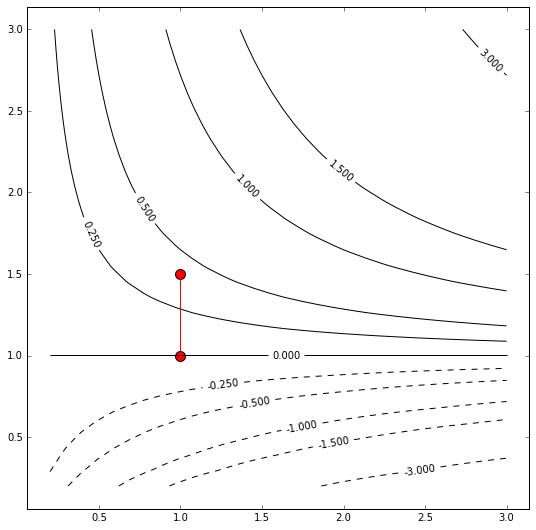

In [22]:
## Make the plot
plt.figure(figsize=(9,9))
p = plt.contour(grid1, grid2, z,
                levels = [-3, -1.5, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 1.5, 3],
                colors = 'black')
plt.clabel(p, inline=1, fontsize=10)

## Add a few points: x0 = (1,1), x1 = (1, 1.5)
x0 = np.array([1,1])
x1 = np.array([1,1.5])
plt.scatter([x0[0], x1[0]], [x0[1], x1[1]], c='red', s=100)
plt.plot([x0[0], x1[0]], [x0[1], x1[1]], c='red')


In [4]:
np.percentile(np.random.normal(size=100), 50)

0.1301056970221905

#1.1) 
(a) What is the correct location of the maximum of this function - x^2?

f(x) = -x^2

d(f(x)/dx = -2x

Maximum of this function = -2(0) = 0

(b) What is the gradient vector of the function? What is it's dimension?

g(x) = -2x. It is one dimentional

(c) Compute the gradient at x0, ∇f(x0).

x0=1

g(1)=-2

(d) Compute x1 = x0 + R · ∇f(x0).

R=0.1
x1= 1 + 0.1*(-2)

x1=1 -.2

x1=.8

(e) Did we move closer to the maximum?

Yes, we moved closer to maximum(0).

In [33]:

#1.1) 2 Gradient ascent function
def gradientfun(x, R, iteration_num, convergence_cri):
    print("Iteration Number: 0"," x: ", x)
    for i in range(0, iteration_num):
        fun_x= -(x*x)
        grad_x= -2 * x
        x_new = x  + R * grad_x 
        grad_x_new = -2 * x_new
        fun_x_new = -(x_new*x_new)
        diff = abs(fun_x - fun_x_new)
        print("Iteration:",i," x:", x_new," f(x):", fun_x," gradient(x):", grad_x)
        if (diff <= convergence_cri):
            break
        x=x_new

#x0 = 1, R = .1, # iterations = 100, stopping parameter = .001
gradientfun(1, .1, 100, .001)

Iteration Number: 0  x:  1
Iteration: 0  x: 0.8  f(x): -1  gradient(x): -2
Iteration: 1  x: 0.64  f(x): -0.6400000000000001  gradient(x): -1.6
Iteration: 2  x: 0.512  f(x): -0.4096  gradient(x): -1.28
Iteration: 3  x: 0.4096  f(x): -0.262144  gradient(x): -1.024
Iteration: 4  x: 0.32768  f(x): -0.16777216  gradient(x): -0.8192
Iteration: 5  x: 0.26214400000000004  f(x): -0.10737418240000002  gradient(x): -0.65536
Iteration: 6  x: 0.20971520000000005  f(x): -0.06871947673600003  gradient(x): -0.5242880000000001
Iteration: 7  x: 0.16777216000000003  f(x): -0.04398046511104002  gradient(x): -0.4194304000000001
Iteration: 8  x: 0.13421772800000004  f(x): -0.02814749767106561  gradient(x): -0.33554432000000006
Iteration: 9  x: 0.10737418240000003  f(x): -0.018014398509481992  gradient(x): -0.26843545600000007
Iteration: 10  x: 0.08589934592000002  f(x): -0.011529215046068476  gradient(x): -0.21474836480000006
Iteration: 11  x: 0.06871947673600001  f(x): -0.0073786976294838245  gradient(x): 

In [6]:
#1.1) 3) 
#x0 = 1, R = .01, # iterations = 100, stopping parameter = .001
gradientfun(1, .01, 100, .001)

Iteration Number: 0  x:  1
Iteration: 0  x: 0.98  f(x): -1  gradient(x): -2
Iteration: 1  x: 0.9604  f(x): -0.9603999999999999  gradient(x): -1.96
Iteration: 2  x: 0.941192  f(x): -0.9223681600000001  gradient(x): -1.9208
Iteration: 3  x: 0.92236816  f(x): -0.885842380864  gradient(x): -1.882384
Iteration: 4  x: 0.9039207968  f(x): -0.8507630225817856  gradient(x): -1.84473632
Iteration: 5  x: 0.885842380864  f(x): -0.8170728068875469  gradient(x): -1.8078415936
Iteration: 6  x: 0.86812553324672  f(x): -0.7847167237348001  gradient(x): -1.771684761728
Iteration: 7  x: 0.8507630225817856  f(x): -0.753641941474902  gradient(x): -1.73625106649344
Iteration: 8  x: 0.8337477621301499  f(x): -0.7237977205924958  gradient(x): -1.7015260451635712
Iteration: 9  x: 0.8170728068875469  f(x): -0.695135330857033  gradient(x): -1.6674955242602998
Iteration: 10  x: 0.800731350749796  f(x): -0.6676079717550946  gradient(x): -1.6341456137750938
Iteration: 11  x: 0.7847167237348001  f(x): -0.64117069607

Reducing the learning rate, it takes more iterations to converge

In [34]:
#1.1) 3) 
#x0 = -2, R = .1, # iterations = 100, stopping parameter = .001
gradientfun(-2, .1, 100, .001)

Iteration Number: 0  x:  -2
Iteration: 0  x: -1.6  f(x): -4  gradient(x): 4
Iteration: 1  x: -1.28  f(x): -2.5600000000000005  gradient(x): 3.2
Iteration: 2  x: -1.024  f(x): -1.6384  gradient(x): 2.56
Iteration: 3  x: -0.8192  f(x): -1.048576  gradient(x): 2.048
Iteration: 4  x: -0.65536  f(x): -0.67108864  gradient(x): 1.6384
Iteration: 5  x: -0.5242880000000001  f(x): -0.42949672960000007  gradient(x): 1.31072
Iteration: 6  x: -0.4194304000000001  f(x): -0.2748779069440001  gradient(x): 1.0485760000000002
Iteration: 7  x: -0.33554432000000006  f(x): -0.17592186044416008  gradient(x): 0.8388608000000002
Iteration: 8  x: -0.26843545600000007  f(x): -0.11258999068426244  gradient(x): 0.6710886400000001
Iteration: 9  x: -0.21474836480000006  f(x): -0.07205759403792797  gradient(x): 0.5368709120000001
Iteration: 10  x: -0.17179869184000005  f(x): -0.046116860184273904  gradient(x): 0.4294967296000001
Iteration: 11  x: -0.13743895347200002  f(x): -0.029514790517935298  gradient(x): 0.3435

If the starting point is farther away, it takes more iteration to converge

In [36]:
#1.1) 3) 
#x0 = 1, R = .1, # iterations = 1000, stopping parameter = .00000001
gradientfun(1, .1, 1000, .000000001)

Iteration Number: 0  x:  1
Iteration: 0  x: 0.8  f(x): -1  gradient(x): -2
Iteration: 1  x: 0.64  f(x): -0.6400000000000001  gradient(x): -1.6
Iteration: 2  x: 0.512  f(x): -0.4096  gradient(x): -1.28
Iteration: 3  x: 0.4096  f(x): -0.262144  gradient(x): -1.024
Iteration: 4  x: 0.32768  f(x): -0.16777216  gradient(x): -0.8192
Iteration: 5  x: 0.26214400000000004  f(x): -0.10737418240000002  gradient(x): -0.65536
Iteration: 6  x: 0.20971520000000005  f(x): -0.06871947673600003  gradient(x): -0.5242880000000001
Iteration: 7  x: 0.16777216000000003  f(x): -0.04398046511104002  gradient(x): -0.4194304000000001
Iteration: 8  x: 0.13421772800000004  f(x): -0.02814749767106561  gradient(x): -0.33554432000000006
Iteration: 9  x: 0.10737418240000003  f(x): -0.018014398509481992  gradient(x): -0.26843545600000007
Iteration: 10  x: 0.08589934592000002  f(x): -0.011529215046068476  gradient(x): -0.21474836480000006
Iteration: 11  x: 0.06871947673600001  f(x): -0.0073786976294838245  gradient(x): 

If the Convergence criteria (f(x1) - f(x0) < convergence criteria) is made stricter, it takes too many iterations to converge.

1.1) 4)Write x = (x1, x2)0 and A =[[a11 a12] [a21 a22]]. Show that f(x) = x'Ax describes a quadratic function.

x'@A = [x1 x2] @ [[a11 a12] [a21 a22]] = [x1.a11 + a21.x2 x1.a12+x2.a22]

x'@A@x = [x1.a11 + a21.x2 x1.a12+x2.a22]  @ [[x1] [x2]] => a11.(x1)^2 + (a12+a21). x1x2 + a22.(x2)^2

This equation "a11.(x1)^2 + (a12+a21). x1x2 + a22.(x2)^2" is a quadratic function.


5)This f(x)<=0, when it is nonpositive definite. 



6)
A= [[a11 a12] [a21 a22]]

A'= [[a11 a21] [a12 a22]]


g(x)= - (A'+A)@x

= - [[2.a11 a12+a21] [a12+a21 2.a22]] @ [[x1 x2]]

= [[-2.a11.x1 - x2.(a12+a21)] [-x1.(a12+a22) -2.a22.x2]] => (1)


Calculating the derivatives of the function(a11.(x1)^2 + (a12+a21). x1x2 + a22.(x2)^2):

g(x1)= d(f(x)/dx1 = 2.x1.a11 + (a12+a21).x2<=0

=> -x1.a11 - (a12+a21).x2 = 0


g(x2)= d(f(x)/dx2 = 2.x2.a22 + (a12+a21).x1<=0

=> -2.x2.a22 - (a12+a21).x1 = 0

[g(x1) g(x2)] = [-2.x1.a11-(a12+a21).x2  -2.x2.a22-(a12+a21).x1] => (2)


This proves that g(x) = - (A'+A)@x







In [39]:
#1.1) 7)w code the algorithm above for 2D case. Do it in matrix form! 
#Show that you get the correct solution if you pick x0 = (2, −3) A = [[1 2], [2 8]]

def gradientmat(x,A, R, iteration_num, convergence_cri):
    print("Iteration Number: 0"," x: ", x)
    for i in range(0, iteration_num):
        fun_x= x.T @ A @ x
        grad_x= -2*(A @ x)      
        x_new = x  + R * grad_x 
        grad_x_new = -2*(A @ x_new)       
        fun_x_new = x_new.T @ A @ x_new
        diff = abs(fun_x - fun_x_new)
        print("Iteration:",i," x:", x_new," f(x):", fun_x," gradient(x):", grad_x)
        if (diff <= convergence_cri):
            break
        x=x_new
    
        
y= np.matrix([[2],[-3]])
A= np.matrix([[1,2],[2,8]])

#x0 = y, R = .1, # iterations = 100, stopping parameter = .0001
gradientmat(y, A, .1, 100, .0001)

Iteration Number: 0  x:  [[ 2]
 [-3]]
Iteration: 0  x: [[2.8]
 [1. ]]  f(x): [[52]]  gradient(x): [[ 8]
 [40]]
Iteration: 1  x: [[ 1.84]
 [-1.72]]  f(x): [[27.04]]  gradient(x): [[ -9.6]
 [-27.2]]
Iteration: 2  x: [[2.16 ]
 [0.296]]  f(x): [[14.3936]]  gradient(x): [[ 3.2 ]
 [20.16]]
Iteration: 3  x: [[ 1.6096]
 [-1.0416]]  f(x): [[7.923968]]  gradient(x): [[ -5.504]
 [-13.376]]
Iteration: 4  x: [[ 1.70432]
 [-0.01888]]  f(x): [[4.5640192]]  gradient(x): [[ 0.9472]
 [10.2272]]
Iteration: 5  x: [[ 1.371008]
 [-0.6704  ]]  f(x): [[2.77884805]]  gradient(x): [[-3.33312]
 [-6.5152 ]]
Iteration: 6  x: [[ 1.3649664]
 [-0.1461632]]  f(x): [[1.79865716]]  gradient(x): [[-0.060416]
 [ 5.242368]]
Iteration: 7  x: [[ 1.1504384 ]
 [-0.45828864]]  f(x): [[1.23601129]]  gradient(x): [[-2.14528  ]
 [-3.1212544]]
Iteration: 8  x: [[ 1.10366618]
 [-0.18520218]]  f(x): [[0.89480493]]  gradient(x): [[-0.46772224]
 [ 2.73086464]]
Iteration: 9  x: [[ 0.95701381]
 [-0.33034516]]  f(x): [[0.67487229]]  gradi

Function converges after 45 iteration for the given x & A. 

In [40]:
#x0 = y, R = .01, # iterations = 1000, stopping parameter = .0001
gradientmat(y, A, .01, 1000, .0001)

Iteration Number: 0  x:  [[ 2]
 [-3]]
Iteration: 0  x: [[ 2.08]
 [-2.6 ]]  f(x): [[52]]  gradient(x): [[ 8]
 [40]]
Iteration: 1  x: [[ 2.1424]
 [-2.2672]]  f(x): [[36.7744]]  gradient(x): [[ 6.24]
 [33.28]]
Iteration: 2  x: [[ 2.19024 ]
 [-1.990144]]  f(x): [[26.28244736]]  gradient(x): [[ 4.784 ]
 [27.7056]]
Iteration: 3  x: [[ 2.22604096]
 [-1.75933056]]  f(x): [[19.04696441]]  gradient(x): [[ 3.580096]
 [23.081344]]
Iteration: 4  x: [[ 2.25189336]
 [-1.56687931]]  f(x): [[14.05184296]]  gradient(x): [[ 2.58524032]
 [19.24512512]]
Iteration: 5  x: [[ 2.26953067]
 [-1.40625435]]  f(x): [[10.5981294]]  gradient(x): [[ 1.76373051]
 [16.06249549]]
Iteration: 6  x: [[ 2.28039023]
 [-1.27203488]]  f(x): [[8.20503038]]  gradient(x): [[ 1.08595608]
 [13.42194699]]
Iteration: 7  x: [[ 2.28566382]
 [-1.15972491]]  f(x): [[6.54181788]]  gradient(x): [[ 0.52735908]
 [11.23099723]]
Iteration: 8  x: [[ 2.28633954]
 [-1.06559548]]  f(x): [[5.38098898]]  gradient(x): [[0.06757201]
 [9.41294331]]
Ite

Iteration: 151  x: [[ 0.62387555]
 [-0.16567916]]  f(x): [[0.19908089]]  gradient(x): [[-0.59057251]
 [ 0.15683506]]
Iteration: 152  x: [[ 0.61802521]
 [-0.16412552]]  f(x): [[0.19536467]]  gradient(x): [[-0.58503446]
 [ 0.15536435]]
Iteration: 153  x: [[ 0.61222972]
 [-0.16258644]]  f(x): [[0.19171781]]  gradient(x): [[-0.57954835]
 [ 0.15390743]]
Iteration: 154  x: [[ 0.60648859]
 [-0.1610618 ]]  f(x): [[0.18813903]]  gradient(x): [[-0.57411368]
 [ 0.15246418]]
Iteration: 155  x: [[ 0.60080129]
 [-0.15955146]]  f(x): [[0.18462706]]  gradient(x): [[-0.56872997]
 [ 0.15103446]]
Iteration: 156  x: [[ 0.59516732]
 [-0.15805527]]  f(x): [[0.18118064]]  gradient(x): [[-0.56339675]
 [ 0.14961814]]
Iteration: 157  x: [[ 0.58958618]
 [-0.15657312]]  f(x): [[0.17779856]]  gradient(x): [[-0.55811354]
 [ 0.14821511]]
Iteration: 158  x: [[ 0.58405738]
 [-0.15510487]]  f(x): [[0.17447961]]  gradient(x): [[-0.55287988]
 [ 0.14682523]]
Iteration: 159  x: [[ 0.57858043]
 [-0.15365039]]  f(x): [[0.171

Iteration: 237  x: [[ 0.27746298]
 [-0.0736843 ]]  f(x): [[0.0393771]]  gradient(x): [[-0.26265176]
 [ 0.06975097]]
Iteration: 238  x: [[ 0.27486109]
 [-0.07299333]]  f(x): [[0.03864205]]  gradient(x): [[-0.26018876]
 [ 0.06909688]]
Iteration: 239  x: [[ 0.2722836 ]
 [-0.07230884]]  f(x): [[0.03792072]]  gradient(x): [[-0.25774886]
 [ 0.06844893]]
Iteration: 240  x: [[ 0.26973029]
 [-0.07163077]]  f(x): [[0.03721286]]  gradient(x): [[-0.25533184]
 [ 0.06780706]]
Iteration: 241  x: [[ 0.26720091]
 [-0.07095906]]  f(x): [[0.03651821]]  gradient(x): [[-0.25293749]
 [ 0.0671712 ]]
Iteration: 242  x: [[ 0.26469525]
 [-0.07029365]]  f(x): [[0.03583653]]  gradient(x): [[-0.25056558]
 [ 0.06654131]]
Iteration: 243  x: [[ 0.2622131 ]
 [-0.06963447]]  f(x): [[0.03516757]]  gradient(x): [[-0.24821592]
 [ 0.06591732]]
Iteration: 244  x: [[ 0.25975421]
 [-0.06898148]]  f(x): [[0.0345111]]  gradient(x): [[-0.2458883 ]
 [ 0.06529919]]
Iteration: 245  x: [[ 0.25731839]
 [-0.06833461]]  f(x): [[0.03386

If the learning rate is decreased, # iterations increase to 343 from 45 

In [41]:
#x0 = y, R = 1, # iterations = 100, stopping parameter = .0001
gradientmat(y, A, 1, 100, .0001)

Iteration Number: 0  x:  [[ 2]
 [-3]]
Iteration: 0  x: [[10]
 [37]]  f(x): [[52]]  gradient(x): [[ 8]
 [40]]
Iteration: 1  x: [[-158]
 [-595]]  f(x): [[12532]]  gradient(x): [[-168]
 [-632]]
Iteration: 2  x: [[2538]
 [9557]]  f(x): [[3233204]]  gradient(x): [[ 2696]
 [10152]]
Iteration: 3  x: [[ -40766]
 [-153507]]  f(x): [[834154100]]  gradient(x): [[ -43304]
 [-163064]]
Iteration: 4  x: [[ 654794]
 [2465669]]  f(x): [[215208524596]]  gradient(x): [[ 695560]
 [2619176]]
Iteration: 5  x: [[-10517470]
 [-39604211]]  f(x): [[55522965191668]]  gradient(x): [[-11172264]
 [-42069880]]
Iteration: 6  x: [[168934314]
 [636133045]]  f(x): [[14324709810925748]]  gradient(x): [[179451784]
 [675737256]]
Iteration: 7  x: [[ -2713466494]
 [-10217732931]]  f(x): [[3695719608253651316]]  gradient(x): [[ -2882400808]
 [-10853865976]]
Iteration: 8  x: [[ 43584398218]
 [164119859941]]  f(x): [[-5749357613265570252]]  gradient(x): [[ 46297864712]
 [174337592872]]
Iteration: 9  x: [[ -700063837982]
 [-2636

If the learning rate increases, the function doesn't even converge. 

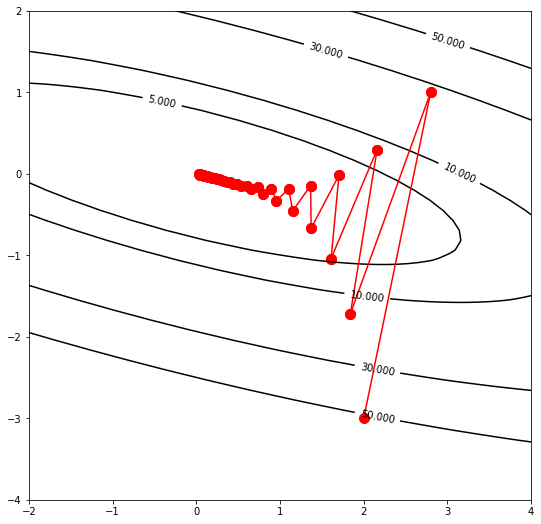

In [42]:
#1.2) 8) Visualizing the convergence

def f(x,A):
    return x.T @ A @ x
def grad(x,A):
    return -2*(A @ x)

def gradient_figure(y,A,level1,exe1,exe2,inum,R,diff1,n):
    ex1 = np.linspace(exe1[0],exe1[1], num=n)
    ex2 = np.linspace(exe2[0],exe2[1], num=n)
    grid1, grid2 = np.meshgrid(ex1, ex2)
    z = np.empty_like(grid1)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            x = np.array([grid1[i,j], grid2[i,j]])
            z[i,j] = f(x,A)
            
    plt.figure(figsize=(9,9))
    p = plt.contour(grid1, grid2, z, levels = level1,colors = 'black')
    plt.clabel(p, inline=1, fontsize=10)
    for i in range(0, inum):
        fun_x= y.T @ A @ y
        grad_x= -2*(A @ y)        
        x_new = y  + R * grad_x 
        grad_x_new = -2*(A @ x_new)        
        fun_x_new = x_new.T @ A @ x_new        
        diff = abs(fun_x - fun_x_new)
        if (diff <= diff1):
            break
        plt.scatter([y[0], x_new[0]], [y[1], x_new[1]], c='red', s=100)
        plt.plot([float(y[0]), float(x_new[0])], [float(y[1]), float(x_new[1])], c='red')
        y=x_new

level2=[-50, -30, -10, -5, 0, 5, 10, 30, 50]
ex1=[-2,4]
ex2=[-4,2]
R=.1
#x0 = y, R = .1, # iterations = 100, stopping parameter = .0001
gradient_figure(y,A,level2,ex1,ex2,100,R,.0001,50)


In [43]:
#9
B = np.matrix([[11,4,7,10,13],[4,17,10,13,16],[7,10,23,16,19],[10,13,16,29,22],[13,16,19,22,35]])
y1=np.matrix([[10],[20],[30],[40],[50]])

#x0 = y1, R = .01, # iterations = 1000, stopping parameter = .01
gradientmat(y1, B, .01, 1000, .01)

Iteration Number: 0  x:  [[10]
 [20]
 [30]
 [40]
 [50]]
Iteration: 0  x: [[-19.]
 [-20.]
 [-21.]
 [-22.]
 [-23.]]  f(x): [[437500]]  gradient(x): [[-2900]
 [-4000]
 [-5100]
 [-6200]
 [-7300]]
Iteration: 1  x: [[ 0.1]
 [ 5.6]
 [11.1]
 [16.6]
 [22.1]]  f(x): [[171775.]]  gradient(x): [[1910.]
 [2560.]
 [3210.]
 [3860.]
 [4510.]]
Iteration: 2  x: [[-10.99]
 [ -9.92]
 [ -8.85]
 [ -7.78]
 [ -6.71]]  f(x): [[67543.75]]  gradient(x): [[-1109.]
 [-1552.]
 [-1995.]
 [-2438.]
 [-2881.]]
Iteration: 3  x: [[-3.239]
 [ 0.272]
 [ 3.783]
 [ 7.294]
 [10.805]]  f(x): [[26644.5775]]  gradient(x): [[ 775.1]
 [1019.2]
 [1263.3]
 [1507.4]
 [1751.5]]
Iteration: 4  x: [[-7.3459]
 [-5.672 ]
 [-3.9981]
 [-2.3242]
 [-0.6503]]  f(x): [[10584.004375]]  gradient(x): [[ -410.69]
 [ -594.4 ]
 [ -778.11]
 [ -961.82]
 [-1145.53]]
Iteration: 5  x: [[-4.08239]
 [-1.54384]
 [ 0.99471]
 [ 3.53326]
 [ 6.07181]]  f(x): [[4266.76959775]]  gradient(x): [[326.351]
 [412.816]
 [499.281]
 [585.746]
 [672.211]]
Iteration: 6  x: [

The same function runs for 5x5 matrix without any modification. Convergence of 1D is faster than 5D. 
Things observed during this GA was that, it is safer to have lower learning rate, to avoid non convergence. But reducing the learning rate, increases the # iterations, taking more time to converge. It is best to play with the learning rate, # iterations & convergence criteria, to come up with optimal solution.

In [44]:
#1.3) 10) Compute the condition number for matrix 5x5 matrox
val, vec = np.linalg.eig(B)
print('\nCondition number of matrix 5x5: ', np.linalg.cond(B))

#Condition matrix of [[1,1],[1,1]]
C = np.matrix([[1,1],[1,1]])
val, vec = np.linalg.eig(C)
#condition_num = (max(val)/min(val))**(.5)
print('\nCondition number of matrix [[1,1],[1,1]]: ', np.linalg.cond(C))


Condition number of matrix 5x5:  22.037957076517493

Condition number of matrix [[1,1],[1,1]]:  5.961777047638983e+16


As the condition number of matrix nears infinity, this matrix is singular

In [45]:
#1.3) 11)Determinant of singular matrix
print("\nDeterminant of matrix [[1,1],[1,1]]: ",np.linalg.det(C))


Determinant of matrix [[1,1],[1,1]]:  0.0


As the determinant of the matrix is 0, it proves that this matrix is singular


1. Hyperparameter: 100

2. New matrix: [[101.   1.]
 [  1. 101.]]

3. Eigen value: [102. 100.]  Eigen vector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

3. Condition number: 1.0199999999999998
Iteration Number: 0  x:  [[ 2]
 [-3]]
Iteration: 0  x: [[ 1.602]
 [-2.398]]  f(x): [[1301.]]  gradient(x): [[-398.]
 [ 602.]]
Iteration: 1  x: [[ 1.283192]
 [-1.916808]]  f(x): [[832.314416]]  gradient(x): [[-318.808]
 [ 481.192]]
Iteration: 2  x: [[ 1.02782083]
 [-1.53217917]]  f(x): [[532.47493101]]  gradient(x): [[-255.371168]
 [ 384.628832]]
Iteration: 3  x: [[ 0.82326538]
 [-1.22473462]]  f(x): [[340.65324389]]  gradient(x): [[-204.55544973]
 [ 307.44455027]]
Iteration: 4  x: [[ 0.65941524]
 [-0.97898476]]  f(x): [[217.9352549]]  gradient(x): [[-163.85013798]
 [ 245.74986202]]
Iteration: 5  x: [[ 0.52817133]
 [-0.78254867]]  f(x): [[139.4260863]]  gradient(x): [[-131.24390983]
 [ 196.43609017]]
Iteration: 6  x: [[ 0.42304582]
 [-0.62553018]]  f(x): [[89.19944508]]  gradient(x):

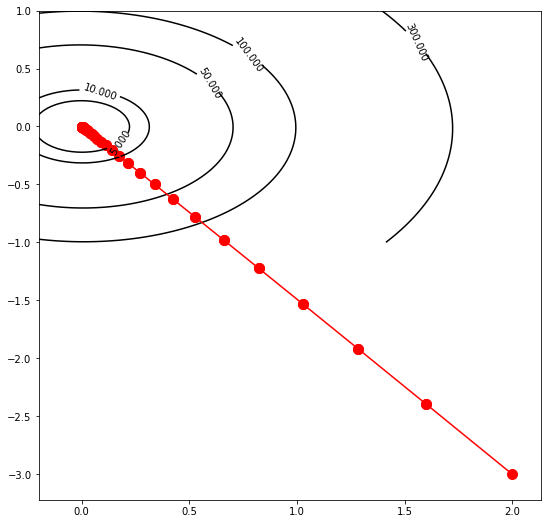

In [46]:
#1.3) 12)Determinant of singular matrix with Alpha values
alpha_1=100
D = C+ alpha_1*np.eye(2)

y= np.matrix([[2],[-3]])

val, vec = np.linalg.eig(D)

print('\n1. Hyperparameter:',alpha_1)
print('\n2. New matrix:',D)
print('\n3. Eigen value:', val," Eigen vector:",vec)
#condition_num = (max(val)/min(val))**(.5)
print('\n3. Condition number:', np.linalg.cond(D))
gradientmat(y, D, .001, 1000, .0001)

level1=[-300,-100, -50, -10, -5, 0,  5, 10, 50,100,300]
ex1=[-0.2,2]
ex2=[-1,1]
gradient_figure(y,D,level1,ex1,ex2,100,.001,.0001,100)


#5. Location of maximum is at [0.0007 -0.0009] and convergence happens at 35th iteration


1. Hyperparameter: 1

2. New matrix: [[2. 1.]
 [1. 2.]]

3. Eigen value: [3. 1.]  Eigen vector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

3. Condition number: 2.999999999999999
Iteration Number: 0  x:  [[ 2]
 [-3]]
Iteration: 0  x: [[ 1.8]
 [-2.2]]  f(x): [[14.]]  gradient(x): [[-2.]
 [ 8.]]
Iteration: 1  x: [[ 1.52]
 [-1.68]]  f(x): [[8.24]]  gradient(x): [[-2.8]
 [ 5.2]]
Iteration: 2  x: [[ 1.248]
 [-1.312]]  f(x): [[5.1584]]  gradient(x): [[-2.72]
 [ 3.68]]
Iteration: 3  x: [[ 1.0112]
 [-1.0368]]  f(x): [[3.282944]]  gradient(x): [[-2.368]
 [ 2.752]]
Iteration: 4  x: [[ 0.81408]
 [-0.82432]]  f(x): [[2.09813504]]  gradient(x): [[-1.9712]
 [ 2.1248]]
Iteration: 5  x: [[ 0.653312]
 [-0.657408]]  f(x): [[1.34233457]]  gradient(x): [[-1.60768]
 [ 1.66912]]
Iteration: 6  x: [[ 0.5234688]
 [-0.5251072]]  f(x): [[0.85901863]]  gradient(x): [[-1.298432]
 [ 1.323008]]
Iteration: 7  x: [[ 0.41910272]
 [-0.41975808]]  f(x): [[0.54975984]]  gradient(x): [[-1.0436608]
 [ 1.0534912

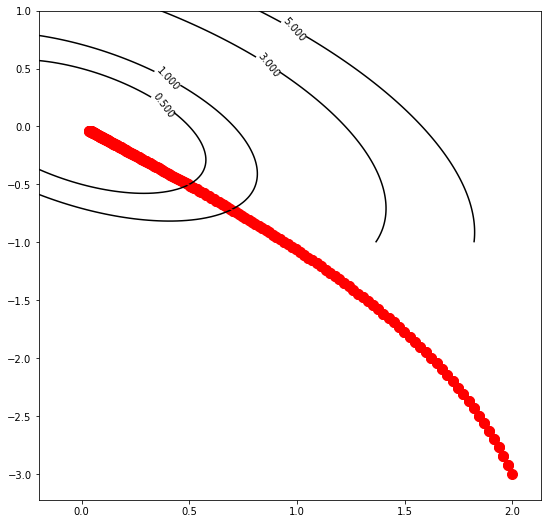

In [47]:
alpha_1=1
D = C+ alpha_1*np.eye(2)

y= np.matrix([[2],[-3]])

val, vec = np.linalg.eig(D)
print('\n1. Hyperparameter:',alpha_1)
print('\n2. New matrix:',D)
print('\n3. Eigen value:', val," Eigen vector:",vec)
#condition_num = (max(val)/min(val))**(.5)
print('\n3. Condition number:', np.linalg.cond(D))

gradientmat(y, D, .1, 1000, .0001)

level1=[-5, -3, -1, -.5, 0,  .5, 1, 3, 5]
ex1=[-0.2,2]
ex2=[-1,1]
gradient_figure(y,D,level1,ex1,ex2,1000,.01,.0001,100)



#5. Location of maximum is at [0.008 -0.008] and convergence happens at 25th iteration. Had to change the learning rate, to create a readable plot


1. Hyperparameter: 0.01

2. New matrix: [[1.01 1.  ]
 [1.   1.01]]

3. Eigen value: [2.01 0.01]  Eigen vector: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

3. Condition number: 201.00000000000261
Iteration Number: 0  x:  [[ 2]
 [-3]]
Iteration: 0  x: [[ 2.00196]
 [-2.99794]]  f(x): [[1.13]]  gradient(x): [[1.96]
 [2.06]]
Iteration: 1  x: [[ 2.00391192]
 [-2.99588808]]  f(x): [[1.12193104]]  gradient(x): [[1.9519208]
 [2.0519188]]
Iteration: 2  x: [[ 2.00585579]
 [-2.99384421]]  f(x): [[1.11392679]]  gradient(x): [[1.94387408]
 [2.04387008]]
Iteration: 3  x: [[ 2.00779165]
 [-2.99180836]]  f(x): [[1.10598672]]  gradient(x): [[1.93585972]
 [2.03585372]]
Iteration: 4  x: [[ 2.00971953]
 [-2.98978049]]  f(x): [[1.09811032]]  gradient(x): [[1.92787757]
 [2.02786957]]
Iteration: 5  x: [[ 2.01163946]
 [-2.98776057]]  f(x): [[1.09029708]]  gradient(x): [[1.91992752]
 [2.01991752]]
Iteration: 6  x: [[ 2.01355147]
 [-2.98574857]]  f(x): [[1.08254649]]  gradient(x): [[1.91200943]
 [2.

Iteration: 124  x: [[ 2.19155584]
 [-2.79595965]]  f(x): [[0.49448164]]  gradient(x): [[1.16987893]
 [1.26963123]]
Iteration: 125  x: [[ 2.19272081]
 [-2.79469492]]  f(x): [[0.49150704]]  gradient(x): [[1.16497651]
 [1.26472682]]
Iteration: 126  x: [[ 2.19388091]
 [-2.79343508]]  f(x): [[0.48855627]]  gradient(x): [[1.1600938 ]
 [1.25984212]]
Iteration: 127  x: [[ 2.19503614]
 [-2.7921801 ]]  f(x): [[0.48562914]]  gradient(x): [[1.15523073]
 [1.25497705]]
Iteration: 128  x: [[ 2.19618653]
 [-2.79092997]]  f(x): [[0.48272545]]  gradient(x): [[1.15038721]
 [1.25013153]]
Iteration: 129  x: [[ 2.19733209]
 [-2.78968467]]  f(x): [[0.47984502]]  gradient(x): [[1.14556316]
 [1.24530549]]
Iteration: 130  x: [[ 2.19847285]
 [-2.78844417]]  f(x): [[0.47698767]]  gradient(x): [[1.14075852]
 [1.24049885]]
Iteration: 131  x: [[ 2.19960882]
 [-2.78720846]]  f(x): [[0.4741532]]  gradient(x): [[1.13597319]
 [1.23571153]]
Iteration: 132  x: [[ 2.20074003]
 [-2.78597751]]  f(x): [[0.47134143]]  gradient

Iteration: 224  x: [[ 2.28677163]
 [-2.69077869]]  f(x): [[0.28924966]]  gradient(x): [[0.76555532]
 [0.86510832]]
Iteration: 225  x: [[ 2.28753391]
 [-2.68991686]]  f(x): [[0.28791785]]  gradient(x): [[0.76227868]
 [0.86182969]]
Iteration: 226  x: [[ 2.28829293]
 [-2.6890583 ]]  f(x): [[0.28659668]]  gradient(x): [[0.75901522]
 [0.85856424]]
Iteration: 227  x: [[ 2.28904869]
 [-2.68820299]]  f(x): [[0.28528607]]  gradient(x): [[0.75576488]
 [0.85531191]]
Iteration: 228  x: [[ 2.28980122]
 [-2.68735091]]  f(x): [[0.28398594]]  gradient(x): [[0.75252761]
 [0.85207265]]
Iteration: 229  x: [[ 2.29055052]
 [-2.68650207]]  f(x): [[0.2826962]]  gradient(x): [[0.74930336]
 [0.8488464 ]]
Iteration: 230  x: [[ 2.29129662]
 [-2.68565643]]  f(x): [[0.28141677]]  gradient(x): [[0.74609208]
 [0.84563313]]
Iteration: 231  x: [[ 2.29203951]
 [-2.684814  ]]  f(x): [[0.28014757]]  gradient(x): [[0.7428937 ]
 [0.84243276]]
Iteration: 232  x: [[ 2.29277922]
 [-2.68397476]]  f(x): [[0.27888851]]  gradient

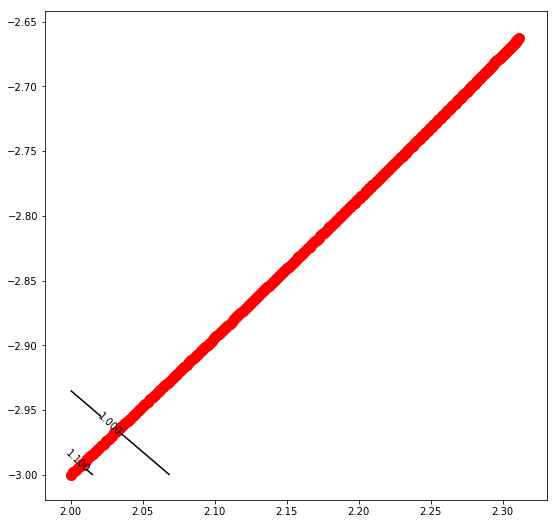

In [27]:
alpha_1=.01
D = C+ alpha_1*np.eye(2)

y= np.matrix([[2],[-3]])

val, vec = np.linalg.eig(D)
print('\n1. Hyperparameter:',alpha_1)
print('\n2. New matrix:',D)
print('\n3. Eigen value:', val," Eigen vector:",vec)
#condition_num = (max(val)/min(val))**(.5)
print('\n3. Condition number:', np.linalg.cond(D))

gradientmat(y, D, .001, 1000, .001)

level1=[.08,.09,1,1.1]

ex1=[2,2.2]
ex2=[-3,-2.8]
gradient_figure(y,D,level1,ex1,ex2,1000,.001,.001,1000)


It is hard to converge with hyper parameter of .01. It converges at 260th iteration, and it is difficult to read the contour diagram. Higher the condition number, harder to converge soon.

In [48]:
#2 Normal Distribution

def normal_outlier(R,N):
    sample_mean=[]
    for i in range(R):
        sample1=np.random.choice(100, N, replace=True)
        sample_mean.append(np.mean(sample1))
    print("\nR:", R)
    print("N:", N)
    print("Mean of means",np.mean(sample_mean))
    print("Standard deviation of means",np.std(sample_mean))
    print("Confidence Interval of means: ",st.t.interval(0.95, len(sample_mean)-1, loc=np.mean(sample_mean), scale=st.sem(sample_mean)))

normal_outlier(1000,10)
normal_outlier(1000,1000)
normal_outlier(1000,100000)



R: 1000
N: 10
Mean of means 49.318
Standard deviation of means 9.427565751560685
Confidence Interval of means:  (48.732682639039204, 49.90331736096079)

R: 1000
N: 1000
Mean of means 49.5236
Standard deviation of means 0.8686482395077998
Confidence Interval of means:  (49.46966933448672, 49.57753066551329)

R: 1000
N: 100000
Mean of means 49.49864719
Standard deviation of means 0.09041854946637831
Confidence Interval of means:  (49.49303348778352, 49.50426089221648)


As the N increases, the std reduces and 95% confidence interval is also becoming better.

In [49]:
normal_outlier(10,10)
normal_outlier(10,1000)
normal_outlier(10,100000)



R: 10
N: 10
Mean of means 50.36
Standard deviation of means 9.40650838515546
Confidence Interval of means:  (43.26699989337912, 57.45300010662088)

R: 10
N: 1000
Mean of means 49.7937
Standard deviation of means 0.767301902773609
Confidence Interval of means:  (49.21511416821863, 50.37228583178137)

R: 10
N: 100000
Mean of means 49.520594
Standard deviation of means 0.0693025419735832
Confidence Interval of means:  (49.468336252759435, 49.57285174724057)


As the N increases, the std reduces and 95% confidence interval is also becoming better. Also even R has an impact: As the R is only 10, C.I. is very different

In [50]:
normal_outlier(100000,10)
normal_outlier(100000,1000)
normal_outlier(100000,100000)


R: 100000
N: 10
Mean of means 49.50877700000001
Standard deviation of means 9.105571726381106
Confidence Interval of means:  (49.45234015349709, 49.56521384650293)

R: 100000
N: 1000
Mean of means 49.49841318
Standard deviation of means 0.9146317246751764
Confidence Interval of means:  (49.49274424104665, 49.50408211895335)

R: 100000
N: 100000
Mean of means 49.499940623
Standard deviation of means 0.09101935799130792
Confidence Interval of means:  (49.499376479891794, 49.50050476610821)


As the R is large, there is not much difference in the Mean and the CI.


R: 1000
N: 10
Mean of means 15.92443949545579
Standard deviation of means 40.87561124391644
Confidence Interval of means:  (13.386647075711837, 18.46223191519974)


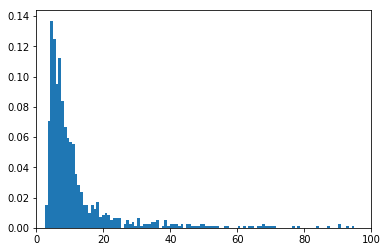

In [51]:
#np.random.pareto(10, 2)
k= 1  
x0=2 

#s = (np.random.pareto(k, 100) + 1) * x0
#np.random.pareto(k, 100)
#print(s)

#s2=plt.hist(s,100, normed=True)

def pareto_outlier(R,N):
    sample_mean=[]
    for i in range(R):
        sample1=(np.random.pareto(k, N) + 1) * x0
        sample_mean.append(np.mean(sample1))
    print("\nR:", R)
    print("N:", N)
    print("Mean of means",np.mean(sample_mean))
    print("Standard deviation of means",np.std(sample_mean))
    print("Confidence Interval of means: ",st.t.interval(0.95, len(sample_mean)-1, loc=np.mean(sample_mean), scale=st.sem(sample_mean)))
    s2=plt.hist(sample_mean,R, normed=True)
    plt.xlim(xmin=0, xmax = 100)

pareto_outlier(1000,10)



R: 1000
N: 1000
Mean of means 27.814748344052774
Standard deviation of means 50.455730566502126
Confidence Interval of means:  (24.682167162569655, 30.947329525535892)


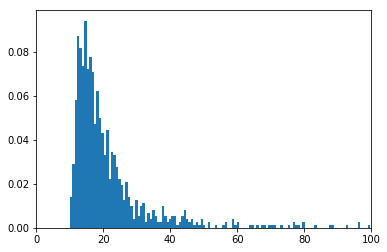

In [52]:
pareto_outlier(1000,1000)


R: 1000
N: 100000
Mean of means 45.216698281376566
Standard deviation of means 369.1152980798633
Confidence Interval of means:  (22.299903229950345, 68.13349333280279)


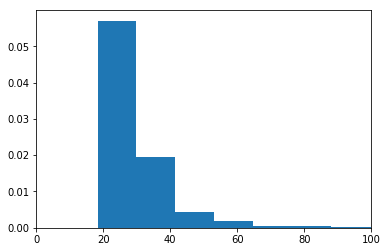

In [53]:
pareto_outlier(1000,100000)

With Differing Ns, the Mean,std increase. Unlike normal distribution, the confidence interval increases for higher N in pareto distribution. 